## Linear Regression Example with pyTorch

First, we implement a gradient descent algorithm for reference, using numpy only

In [185]:
%matplotlib inline
import matplotlib.pylab as plt

import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x)).T

# Learning rate
eta = 0.01
              
# initial parameters
w = np.array([2., 1.])

for epoch in range(10):
    # Error
    err = y-A.dot(w)
    
    # Total error
    E = np.sum(err**2)/N
    
    # Gradient
    dE = -2.*A.T.dot(err)/N
    
    if epoch%1 == 0: 
        print(epoch,':',E)
        # print(w)    

    # Perfom one descent step
    w = w - eta*dE

0 : 15.9938818182
1 : 11.6346546383
2 : 8.57455118197
3 : 6.4263659935
4 : 4.91830088281
5 : 3.85956758638
6 : 3.11624261595
7 : 2.5943186121
8 : 2.2278072717
9 : 1.97038821883


### Animated Visualization of Gradient Descent

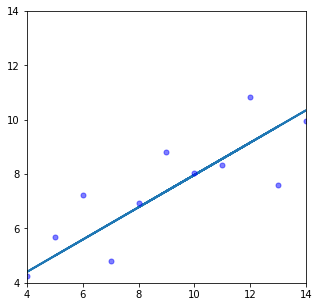

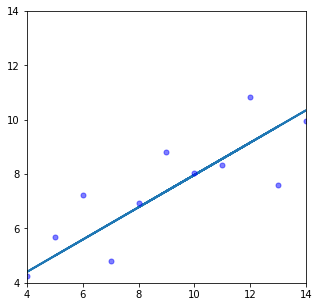

In [186]:

              
w = np.array([2., 1.])

f = A.dot(w)

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.set_xlim((4,14))
ax.set_ylim((4,14))
ln = plt.Line2D(xdata=x, ydata=f, linestyle='-',linewidth=2)
ax.add_line(ln)

plt.plot(x,y,'bo', alpha=0.5, markersize=5)

for epoch in range(30):
    f = A.dot(w)
    err = y-f
    
    ln.set_xdata(x)
    ln.set_ydata(f)
    
    E = np.sum(err**2)/N
    dE = -2.*A.T.dot(err)/N
    
    if epoch%1 == 0: 
        print(epoch,':',E)
        # print(w)    
        
    w = w - eta*dE


    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)


    

## Implementation in pyTorch

### Fitting a line

In [187]:

import torch
import torch.autograd
from torch.autograd import Variable

## The rows correspond to examples and the columns to features.
## There is only one feature so the Tensors are actually just vectors
x = torch.FloatTensor([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]]).transpose_(0,1)
#yy = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
yy = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y = torch.FloatTensor([yy]).transpose_(0,1)


# This is a linear unit that implements the function f(x) = weight*x + bias
f = torch.nn.Linear(1, 1, bias=True)

# Set w_1
f.weight.data = torch.FloatTensor([[1.]])
# Set w_0
f.bias.data = torch.FloatTensor([[2.]])

# learning rate
eta = 0.01

# This is the error function E(x, y) = (1/N) \sum_{i=1}^N (x_i-y_i)^2
EuclidianLoss = torch.nn.MSELoss(size_average=True)

for epoch in range(10):
    ## Compute the forward pass
    E = EuclidianLoss(f(Variable(x)), Variable(y))

    if epoch%1 == 0: 
        print(epoch,':',E.data[0])
#        print(f.bias.data.numpy())
#        print(f.weight.data.numpy())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    for param in f.parameters():
        param.data.add_(-eta * param.grad.data)

    # Reset the gradients, as otherwise they are accumulated in param.grad
    f.zero_grad()

#print('Weights')
#print(f.weight.data, f.bias.data)

0 : 15.993881225585938
1 : 11.634653091430664
2 : 8.574551582336426
3 : 6.426366806030273
4 : 4.918301105499268
5 : 3.8595666885375977
6 : 3.1162407398223877
7 : 2.59431791305542
8 : 2.2278072834014893
9 : 1.970388412475586


### Fitting a polynomial

In [204]:
import torch
import torch.autograd
from torch.autograd import Variable

## The rows correspond to examples and the columns to features.
## There is only one feature so the Tensors are actually just vectors
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
#yy = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
yy = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y = torch.DoubleTensor([yy]).transpose_(0,1)

# Setup the feature (vandermonde) matrix
N = len(x)
degree = 2
xx = np.vstack((np.power(x,i) for i in range(degree+1))).T
A = torch.from_numpy(xx)

# This is a linear unit that implements the function f(x) = weight*x + bias
f = torch.nn.Linear(degree+1, 1, bias=False).double()


# learning rate
eta = 0.00005

# This is the error function E(x, y) = (1/N) \sum_{i=1}^N (x_i-y_i)^2
EuclidianLoss = torch.nn.MSELoss(size_average=True)

for epoch in range(10000):
    ## Compute the forward pass
    E = EuclidianLoss(f(Variable(A)), Variable(y))

    if epoch%1000 == 0: 
        print(epoch,':',E.data[0])
#        print(f.bias.data.numpy())
#        print(f.weight.data.numpy())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    for param in f.parameters():
        param.data.add_(-eta * param.grad.data)

    # Reset the gradients, as otherwise they are accumulated in param.grad
    f.zero_grad()
    
print(epoch,':',E.data[0])

0 : 2599.5730192777323
1000 : 4.736779570171182
2000 : 2.437847612815926
3000 : 1.6243704976405444
4000 : 1.3365154740247316
5000 : 1.234649683251317
6000 : 1.1985954394842393
7000 : 1.1858283643663752
8000 : 1.181301382004134
9000 : 1.1796901466128118
9999 : 1.1791109964218403


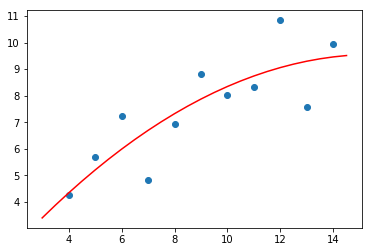

In [205]:

plt.plot(x, y.numpy(),'o')

x2 = np.arange(3,15,0.5)
xx = np.vstack((np.power(x2,i) for i in range(degree+1))).T
A = torch.from_numpy(xx)

plt.plot(x2, f(Variable(A)).data.numpy(),'r-')
plt.show()

Autograd : Automatic differentiation example

In [209]:
import torch
from torch.autograd import Variable

x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [210]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



Calculating the derivative of the sigmoid function using autodiff

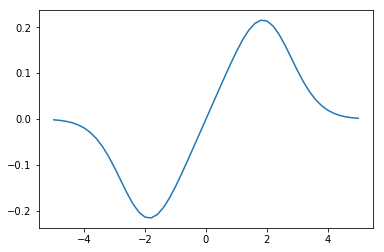

In [19]:
%matplotlib inline
import matplotlib.pylab as plt

x = Variable(torch.arange(-5,5,0.2), requires_grad=True)
#print(x)

y = torch.sum(torch.sigmoid(0.3*x*x))
#print(y)

#plt.plot(x.data.numpy(), y.data.numpy() )
#plt.show()

y.backward()
plt.plot(x.data.numpy(), x.grad.data.numpy() )
plt.show()
